In [1]:
from google.colab import files
train_upload=files.upload()

Saving train.csv to train (3).csv


In [2]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

In [3]:
from google.colab import files
test_upload=files.upload()

Saving test.csv to test (3).csv


In [177]:
train_data=pd.read_csv(io.BytesIO(train_upload["train.csv"]))
test_data=pd.read_csv(io.BytesIO(test_upload["test.csv"]))

In [5]:
train_data.head()
test_data.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,fffe31003300390039003000,2008-12-10,Female,Service,No,2.0,5.0,7.7
1,fffe31003300310037003800,2008-08-14,Female,Product,Yes,1.0,2.0,5.2
2,fffe33003400380035003900,2008-11-13,Male,Product,Yes,1.0,3.0,5.9
3,fffe3100370039003200,2008-02-07,Female,Service,No,3.0,6.0,4.6
4,fffe32003600390036003700,2008-07-17,Female,Product,No,2.0,5.0,6.4


In [6]:
train_data.isnull().sum()
test_data.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
dtype: int64

In [7]:
test_data.shape

(12250, 8)

In [8]:
train_data.shape

(22750, 9)

In [9]:
train_data["Resource Allocation"].fillna(int(train_data["Resource Allocation"].mean()),inplace=True)
train_data["Mental Fatigue Score"].fillna(int(train_data["Mental Fatigue Score"].mean()),inplace=True)
train_data["Burn Rate"].fillna(int(train_data["Burn Rate"].mean()),inplace=True)
train_data

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2.0,3.0,3.8,0.16
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1.0,2.0,5.0,0.36
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2.0,4.0,5.8,0.49
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1.0,1.0,2.6,0.20
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3.0,7.0,6.9,0.52
...,...,...,...,...,...,...,...,...,...
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1.0,3.0,5.0,0.41
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3.0,6.0,6.7,0.59
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3.0,7.0,5.0,0.72
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2.0,5.0,5.9,0.52


In [10]:
train_data.isnull().sum()

Employee ID             0
Date of Joining         0
Gender                  0
Company Type            0
WFH Setup Available     0
Designation             0
Resource Allocation     0
Mental Fatigue Score    0
Burn Rate               0
dtype: int64

In [11]:
train_data.drop((["Date of Joining","Employee ID","Company Type"]),inplace=True,axis=1)
test_data.drop((["Date of Joining","Employee ID","Company Type"]),inplace=True,axis=1)
test_data

,Gender,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score
0,Female,No,2.0,5.0,7.7
1,Female,Yes,1.0,2.0,5.2
2,Male,Yes,1.0,3.0,5.9
3,Female,No,3.0,6.0,4.6
4,Female,No,2.0,5.0,6.4
...,...,...,...,...,...
12245,Female,Yes,1.0,2.0,6.1
12246,Female,Yes,2.0,4.0,5.9
12247,Male,No,4.0,7.0,9.6
12248,Male,No,3.0,6.0,6.7


In [12]:
train_gender_dummies=pd.get_dummies(train_data["Gender"],drop_first=True)
train_gender_dummies.rename(columns={"Male":"Sex"},inplace=True)
test_gender_dummies=pd.get_dummies(test_data["Gender"],drop_first=True)
test_gender_dummies.rename(columns={"Male":"Sex"},inplace=True)

In [13]:
train_WFH_Setup_Available_dummies=pd.get_dummies(train_data["WFH Setup Available"],drop_first=True)
train_WFH_Setup_Available_dummies.rename(columns={"Yes":"WFH Setup Available value"},inplace=True)
test_WFH_Setup_Available_dummies=pd.get_dummies(test_data["WFH Setup Available"],drop_first=True)
test_WFH_Setup_Available_dummies.rename(columns={"Yes":"WFH Setup Available value"},inplace=True)
test_WFH_Setup_Available_dummies

,WFH Setup Available value
0,0
1,1
2,1
3,0
4,0
...,...
12245,1
12246,1
12247,0
12248,0


In [14]:
train_main_data_set=pd.concat([train_data,train_WFH_Setup_Available_dummies,train_gender_dummies],axis=1)
test_main_data_set=pd.concat([test_data,test_WFH_Setup_Available_dummies,test_gender_dummies],axis=1)
test_main_data_set

,Gender,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,WFH Setup Available value,Sex
0,Female,No,2.0,5.0,7.7,0,0
1,Female,Yes,1.0,2.0,5.2,1,0
2,Male,Yes,1.0,3.0,5.9,1,1
3,Female,No,3.0,6.0,4.6,0,0
4,Female,No,2.0,5.0,6.4,0,0
...,...,...,...,...,...,...,...
12245,Female,Yes,1.0,2.0,6.1,1,0
12246,Female,Yes,2.0,4.0,5.9,1,0
12247,Male,No,4.0,7.0,9.6,0,1
12248,Male,No,3.0,6.0,6.7,0,1


In [15]:
train_main_data_set.drop(["Gender","WFH Setup Available"],axis=1,inplace=True)
test_main_data_set.drop(["Gender","WFH Setup Available"],axis=1,inplace=True)

In [16]:
train_score=train_main_data_set["Burn Rate"]
train_data_set=train_main_data_set.drop((["Burn Rate"]),axis=1)
train_data_set


,Designation,Resource Allocation,Mental Fatigue Score,WFH Setup Available value,Sex
0,2.0,3.0,3.8,0,0
1,1.0,2.0,5.0,1,1
2,2.0,4.0,5.8,1,0
3,1.0,1.0,2.6,1,1
4,3.0,7.0,6.9,0,0
...,...,...,...,...,...
22745,1.0,3.0,5.0,0,0
22746,3.0,6.0,6.7,1,0
22747,3.0,7.0,5.0,1,1
22748,2.0,5.0,5.9,0,0


In [17]:
only_train_data,val_data,only_train_score,val_burn_rate=train_test_split(train_data_set, train_score, test_size=0.20, shuffle=True)

In [48]:
val_burn_rate.shape

(4550,)

In [19]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
only_train_data=scaler.fit_transform(only_train_data)
val_data=scaler.transform(val_data)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [164]:
model=Sequential()
model.add(Dense(128,activation="relu",input_shape=(train_data_set.shape[1],)))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(Dense(256,activation="relu"))
model.add(BatchNormalization())
model.add(Dense(1,activation="linear"))
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_80 (Dense)             (None, 128)               768       
_________________________________________________________________
dense_81 (Dense)             (None, 256)               33024     
_________________________________________________________________
dense_82 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_83 (Dense)             (None, 256)               65792     
_________________________________________________________________
batch_normalization_10 (Batc (None, 256)               1024      
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 257       
Total params: 166,657
Trainable params: 166,145
Non-trainable params: 512
_____________________________________________

In [165]:
model.compile(optimizer="adam",loss="mean_absolute_error",metrics=["mean_absolute_error"])

In [166]:
history=model.fit(x=only_train_data,y=only_train_score,epochs=500,validation_data=(val_data,val_burn_rate),)

Epoch 1/500
569/569 [==============================] - 2s 3ms/step - loss: 0.1329 - mean_absolute_error: 0.1329 - val_loss: 0.1376 - val_mean_absolute_error: 0.1376
Epoch 2/500
569/569 [==============================] - 2s 3ms/step - loss: 0.0863 - mean_absolute_error: 0.0863 - val_loss: 0.0956 - val_mean_absolute_error: 0.0956
Epoch 3/500
569/569 [==============================] - 2s 3ms/step - loss: 0.0848 - mean_absolute_error: 0.0848 - val_loss: 0.0858 - val_mean_absolute_error: 0.0858
Epoch 4/500
569/569 [==============================] - 2s 3ms/step - loss: 0.0839 - mean_absolute_error: 0.0839 - val_loss: 0.0891 - val_mean_absolute_error: 0.0891
Epoch 5/500
569/569 [==============================] - 2s 3ms/step - loss: 0.0843 - mean_absolute_error: 0.0843 - val_loss: 0.1402 - val_mean_absolute_error: 0.1402
Epoch 6/500
569/569 [==============================] - 2s 3ms/step - loss: 0.0850 - mean_absolute_error: 0.0850 - val_loss: 0.1303 - val_mean_absolute_error: 0.1303
Epoch 7/50

In [167]:
def plot(data,string):
  plt.plot(data.history[string])
  plt.plot(data.history["val_"+string])
  plt.xlabel("epochs")
  plt.ylabel(string)
  plt.legend([string,"val_"+string])
  plt.show()


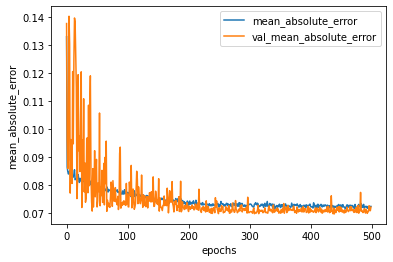

In [168]:
plot(history,"mean_absolute_error")

In [169]:
from sklearn.metrics import r2_score
train_pred=model.predict(only_train_data)
val_pred=model.predict(val_data)
train_r2=r2_score(train_pred,only_train_score)
val_r2=r2_score(val_pred,val_burn_rate)
print(train_r2)
print(val_r2)

0.6483805115976863
0.5524148575051177


In [170]:
test_main_data_set

,Designation,Resource Allocation,Mental Fatigue Score,WFH Setup Available value,Sex
0,2.0,5.0,7.7,0,0
1,1.0,2.0,5.2,1,0
2,1.0,3.0,5.9,1,1
3,3.0,6.0,4.6,0,0
4,2.0,5.0,6.4,0,0
...,...,...,...,...,...
12245,1.0,2.0,6.1,1,0
12246,2.0,4.0,5.9,1,0
12247,4.0,7.0,9.6,0,1
12248,3.0,6.0,6.7,0,1


In [178]:
burn_rate_pred=model.predict(test_main_data_set)

In [176]:
result=pd.DataFrame()


In [180]:
result["Employee ID"]=test_data["Employee ID"]
result["Burn Rate"]=burn_rate_pred

In [182]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [183]:
result.to_csv('/content/drive/My Drive/Hacker_Earth_Burn_out_rate.csv',index=False)